# Retail Sales EDA

This notebook performs Exploratory Data Analysis (EDA) on a retail sales dataset (`train.csv`).

**Goals:**
- Understand the structure of the data (rows, columns, data types).
- Check for missing values and data quality issues.
- Get a first look at sales patterns across categories, regions, customers, and time.


## Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Make plots show inline in the notebook
%matplotlib inline

# Optional: nicer display options
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)

## Load the dataset

In [4]:
# Path to the dataset (relative to this notebook)
data_path = "../data/raw/train.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(data_path)

In [5]:
# Quick peek
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Basic shape & info

In [6]:
print("Shape (rows, columns):", df.shape)

print("\nData types:")
print(df.dtypes)

print("\nBasic info:")
df.info()

Shape (rows, columns): (9800, 18)

Data types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Nam

## Missing values & duplicates

In [7]:
# Missing values per column
print("Missing values per column:")
print(df.isna().sum())

# Number of duplicated rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing values per column:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Number of duplicate rows: 0


## Convert date columns to proper datetime

In [8]:
# Convert Order Date and Ship Date from string to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
df["Ship Date"]  = pd.to_datetime(df["Ship Date"], dayfirst=True)

# Quick check
df[["Order Date", "Ship Date"]].head()


,Order Date,Ship Date
0,2017-11-08,2017-11-11
1,2017-11-08,2017-11-11
2,2017-06-12,2017-06-16
3,2016-10-11,2016-10-18
4,2016-10-11,2016-10-18


## Handle duplicates

In [9]:
# Check duplicates
print("Duplicate rows before:", df.duplicated().sum())

# Drop duplicate rows if any
df = df.drop_duplicates()

print("Duplicate rows after:", df.duplicated().sum())
print("Current shape:", df.shape)

Duplicate rows before: 0
Duplicate rows after: 0
Current shape: (9800, 18)


## Handle missing values

In [10]:
# Check missing values again (after cleaning)
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [11]:
# Convert Postal Code from float to nullable integer
df["Postal Code"] = df["Postal Code"].astype("Int64")

df[["Postal Code"]].head()

,Postal Code
0,42420
1,42420
2,90036
3,33311
4,33311


## Create date-based features (for time analysis later)

In [12]:
# Create useful date features from Order Date
df["Order Year"]       = df["Order Date"].dt.year
df["Order Month"]      = df["Order Date"].dt.month
df["Order Month Name"] = df["Order Date"].dt.strftime("%b")   # Jan, Feb, ...
df["Order Day"]        = df["Order Date"].dt.day
df["Order Weekday"]    = df["Order Date"].dt.day_name()       # Monday, ...

df[["Order Date", "Order Year", "Order Month", "Order Month Name", "Order Weekday"]].head()

,Order Date,Order Year,Order Month,Order Month Name,Order Weekday
0,2017-11-08,2017,11,Nov,Wednesday
1,2017-11-08,2017,11,Nov,Wednesday
2,2017-06-12,2017,6,Jun,Monday
3,2016-10-11,2016,10,Oct,Tuesday
4,2016-10-11,2016,10,Oct,Tuesday


In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Month Name,Order Day,Order Weekday
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,Nov,8,Wednesday
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,Nov,8,Wednesday
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,Jun,12,Monday
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,Oct,11,Tuesday
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,Oct,11,Tuesday


## Univariate EDA (one feature at a time)

### Basic summary stats for numeric columns

In [14]:
# Basic descriptive statistics for numeric columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9800.0,4900.5,1.0,2450.75,4900.5,7350.25,9800.0,2829.160653
Order Date,9800,2017-05-01 05:13:51.673469440,2015-01-03 00:00:00,2016-05-24 00:00:00,2017-06-26 00:00:00,2018-05-15 00:00:00,2018-12-30 00:00:00,NaN
Ship Date,9800,2017-05-05 04:17:52.653061120,2015-01-07 00:00:00,2016-05-27 18:00:00,2017-06-29 00:00:00,2018-05-19 00:00:00,2019-01-05 00:00:00,NaN
Postal Code,9789.0,55273.322403,1040.0,23223.0,58103.0,90008.0,99301.0,32041.223413
Sales,9800.0,230.769059,0.444,17.248,54.49,210.605,22638.48,626.651875
Order Year,9800.0,2016.724184,2015.0,2016.0,2017.0,2018.0,2018.0,1.123984
Order Month,9800.0,7.818469,1.0,5.0,9.0,11.0,12.0,3.281905
Order Day,9800.0,15.486837,1.0,8.0,16.0,23.0,31.0,8.753733


### Distribution of Sales

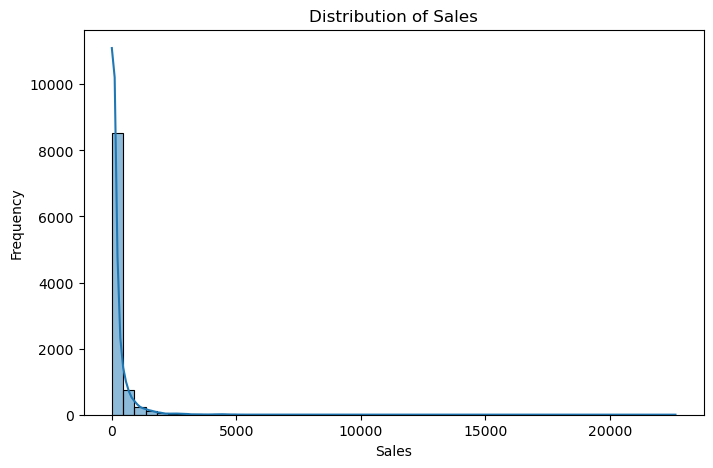

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sales"], bins=50, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

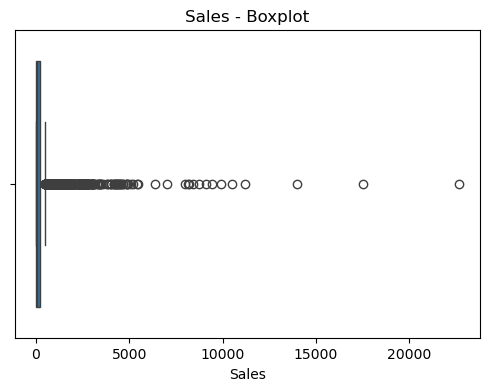

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Sales"])
plt.title("Sales - Boxplot")
plt.xlabel("Sales")
plt.show()

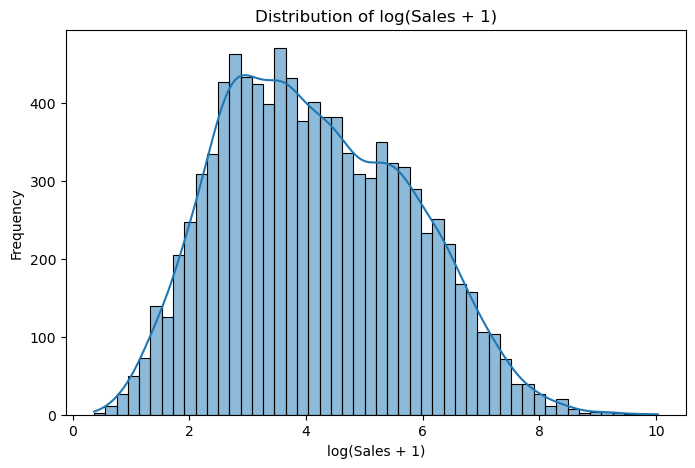

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(df["Sales"]), bins=50, kde=True)
plt.title("Distribution of log(Sales + 1)")
plt.xlabel("log(Sales + 1)")
plt.ylabel("Frequency")
plt.show()

## Category-wise counts (Category, Sub-Category)

### Category

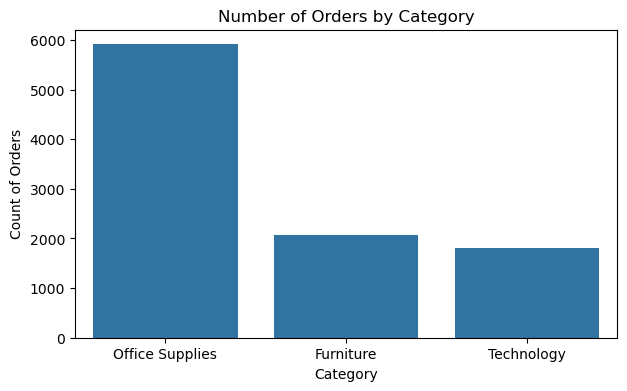

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [18]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="Category", order=df["Category"].value_counts().index)
plt.title("Number of Orders by Category")
plt.xlabel("Category")
plt.ylabel("Count of Orders")
plt.show()

df["Category"].value_counts()

### Sub-Category (top)

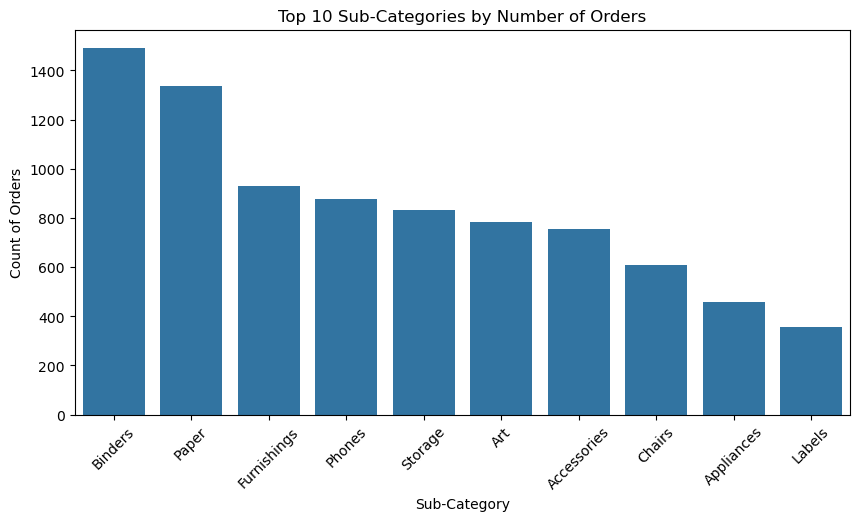

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Name: count, dtype: int64

In [19]:
plt.figure(figsize=(10, 5))
sub_counts = df["Sub-Category"].value_counts().head(10)
sns.barplot(x=sub_counts.index, y=sub_counts.values)
plt.title("Top 10 Sub-Categories by Number of Orders")
plt.xlabel("Sub-Category")
plt.ylabel("Count of Orders")
plt.xticks(rotation=45)
plt.show()

sub_counts

### Region, Segment, and Ship Mode

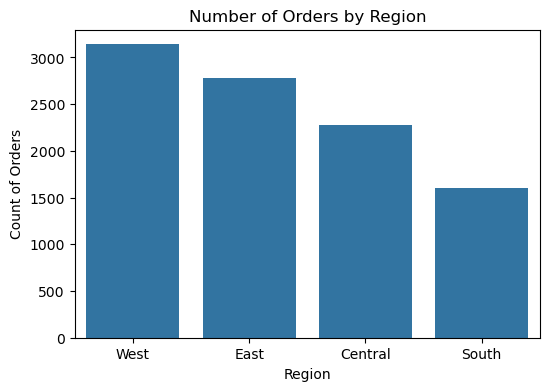

Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

In [20]:
plt.figure(figsize=(6, 4))
region_counts = df["Region"].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Number of Orders by Region")
plt.xlabel("Region")
plt.ylabel("Count of Orders")
plt.show()

region_counts

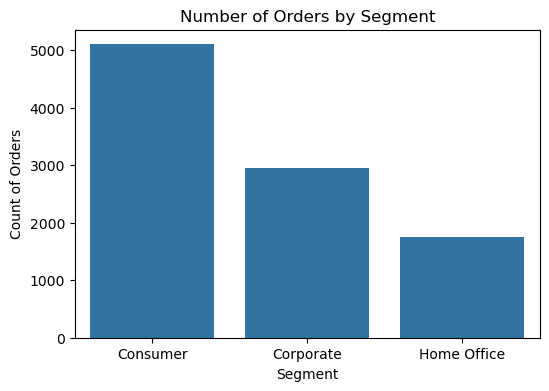

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [21]:
plt.figure(figsize=(6, 4))
segment_counts = df["Segment"].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title("Number of Orders by Segment")
plt.xlabel("Segment")
plt.ylabel("Count of Orders")
plt.show()

segment_counts


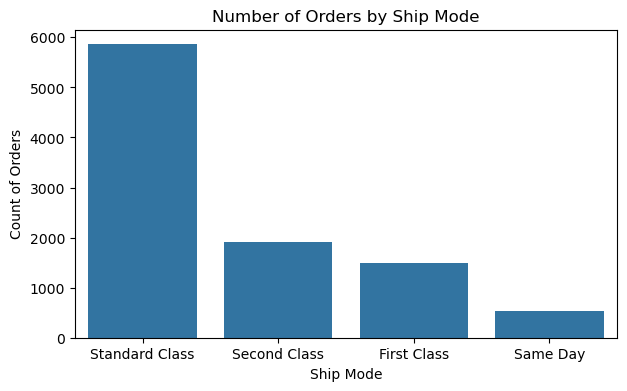

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

In [22]:
plt.figure(figsize=(7, 4))
ship_counts = df["Ship Mode"].value_counts()
sns.barplot(x=ship_counts.index, y=ship_counts.values)
plt.title("Number of Orders by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Count of Orders")
plt.show()

ship_counts

### Orders over Years (simple time check)

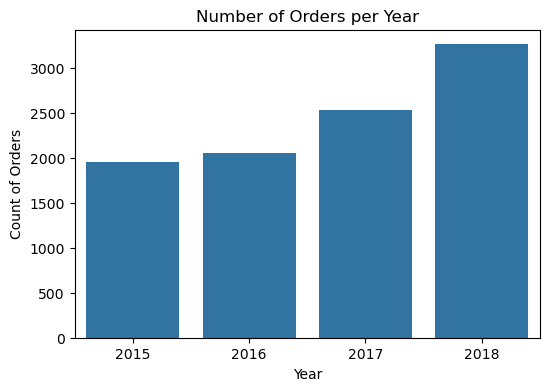

Order Year
2015    1953
2016    2055
2017    2534
2018    3258
Name: count, dtype: int64

In [23]:
plt.figure(figsize=(6, 4))
year_counts = df["Order Year"].value_counts().sort_index()
sns.barplot(x=year_counts.index.astype(str), y=year_counts.values)
plt.title("Number of Orders per Year")
plt.xlabel("Year")
plt.ylabel("Count of Orders")
plt.show()

year_counts

## Step 5 – Bivariate EDA (Sales vs other features)

### 5.1 Sales by Category

In [24]:
# Total Sales by Category
sales_by_category = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
sales_by_category

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

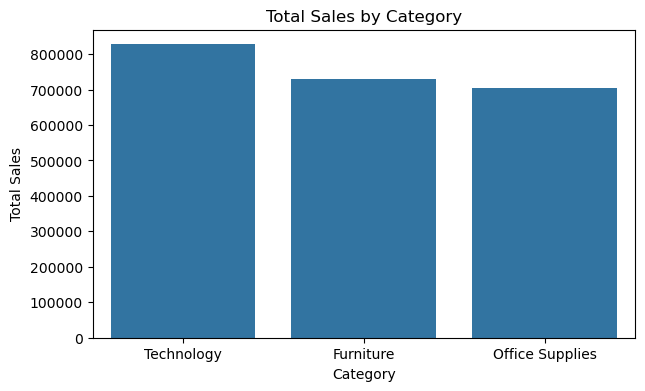

In [25]:
plt.figure(figsize=(7, 4))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

### 5.2 Sales by Sub-Category (Top 10)

In [26]:
sales_by_subcat = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
sales_by_subcat.head(10)

Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Name: Sales, dtype: float64

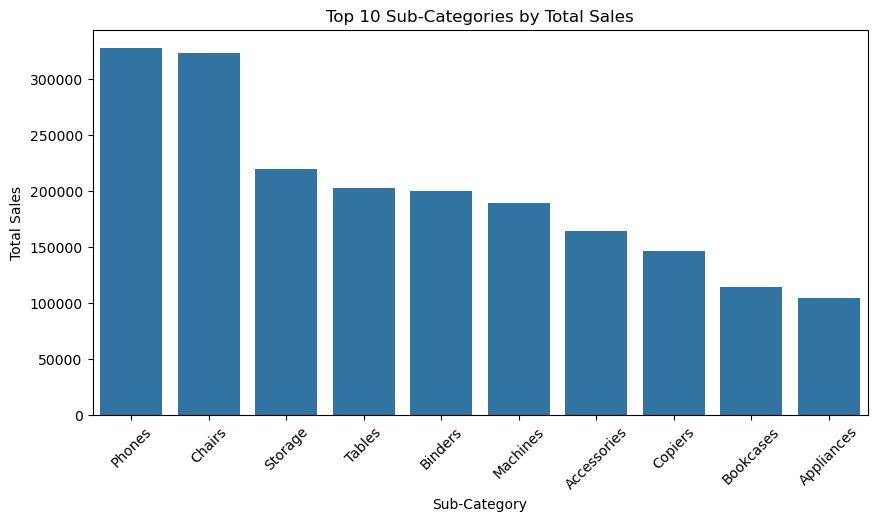

In [27]:
plt.figure(figsize=(10, 5))
top_subcats = sales_by_subcat.head(10)
sns.barplot(x=top_subcats.index, y=top_subcats.values)
plt.title("Top 10 Sub-Categories by Total Sales")
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

### 5.3 Sales by Region

In [28]:
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
sales_by_region

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

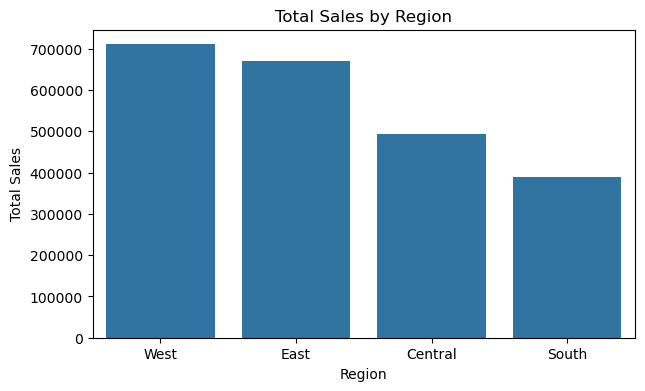

In [29]:
plt.figure(figsize=(7, 4))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

### 5.4 Sales by Segment

In [30]:
sales_by_segment = df.groupby("Segment")["Sales"].sum().sort_values(ascending=False)
sales_by_segment

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

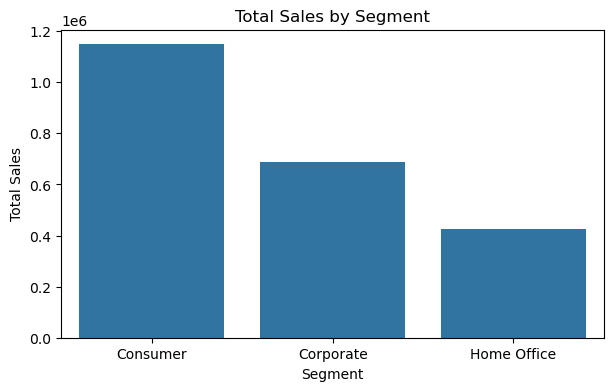

In [31]:
plt.figure(figsize=(7, 4))
sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values)
plt.title("Total Sales by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales")
plt.show()

### 5.5 Sales by Ship Mode

In [32]:
sales_by_ship = df.groupby("Ship Mode")["Sales"].sum().sort_values(ascending=False)
sales_by_ship

Ship Mode
Standard Class    1.340831e+06
Second Class      4.499142e+05
First Class       3.455723e+05
Same Day          1.252190e+05
Name: Sales, dtype: float64

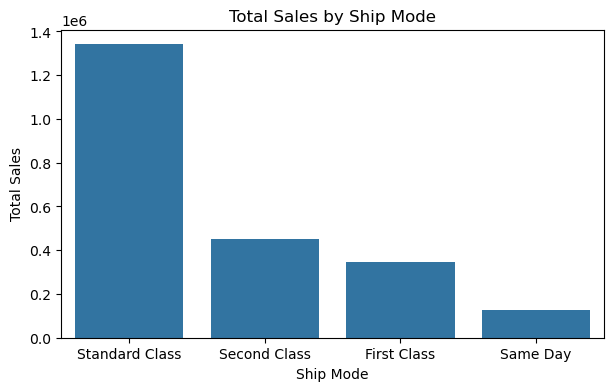

In [33]:
plt.figure(figsize=(7, 4))
sns.barplot(x=sales_by_ship.index, y=sales_by_ship.values)
plt.title("Total Sales by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Total Sales")
plt.show()

### 5.6 Monthly Sales Trend (Time Series)

In [34]:
# Set index to Order Date for resampling
df_ts = df.set_index("Order Date")

# Monthly total sales
monthly_sales = df_ts["Sales"].resample("M").sum()
monthly_sales.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_28352\916372529.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_ts["Sales"].resample("M").sum()


Order Date
2015-01-31    14205.707
2015-02-28     4519.892
2015-03-31    55205.797
2015-04-30    27906.855
2015-05-31    23644.303
Freq: ME, Name: Sales, dtype: float64

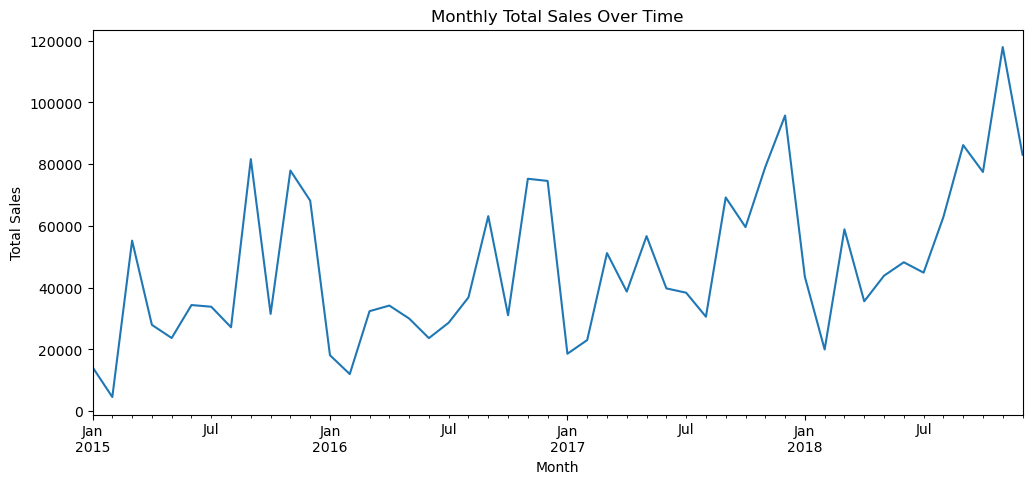

In [35]:
plt.figure(figsize=(12, 5))
monthly_sales.plot()
plt.title("Monthly Total Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [36]:
# Average monthly sales by month number (1-12)
avg_sales_by_month = df.groupby("Order Month")["Sales"].mean().sort_index()
avg_sales_by_month

Order Month
1     257.627403
2     199.902745
3     290.549393
4     207.432269
5     212.533412
6     211.052856
7     208.802997
8     227.007110
9     221.642106
10    246.596162
11    241.657496
12    232.619515
Name: Sales, dtype: float64

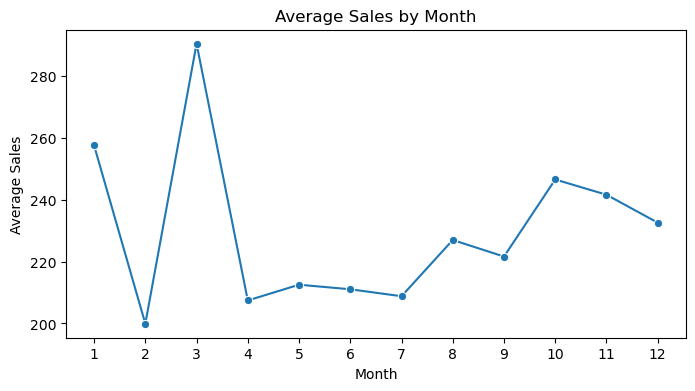

In [37]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=avg_sales_by_month.index, y=avg_sales_by_month.values, marker="o")
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1, 13))
plt.show()

### 5.7 Top Customers by Sales

In [38]:
sales_by_customer = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)
sales_by_customer.head(10)

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

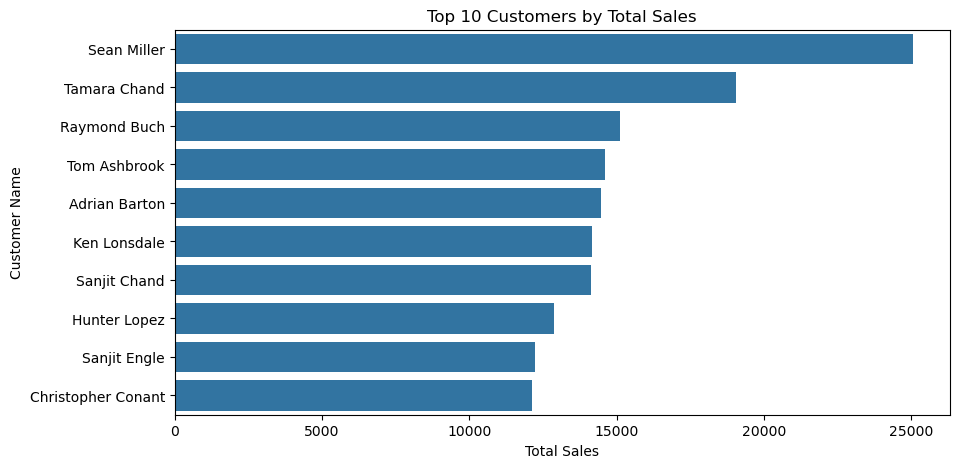

In [39]:
plt.figure(figsize=(10, 5))
top_customers = sales_by_customer.head(10)
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.show()

### 5.8 Top States or Cities by Sales

In [40]:
sales_by_state = df.groupby("State")["Sales"].sum().sort_values(ascending=False)
sales_by_state.head(10)

State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64

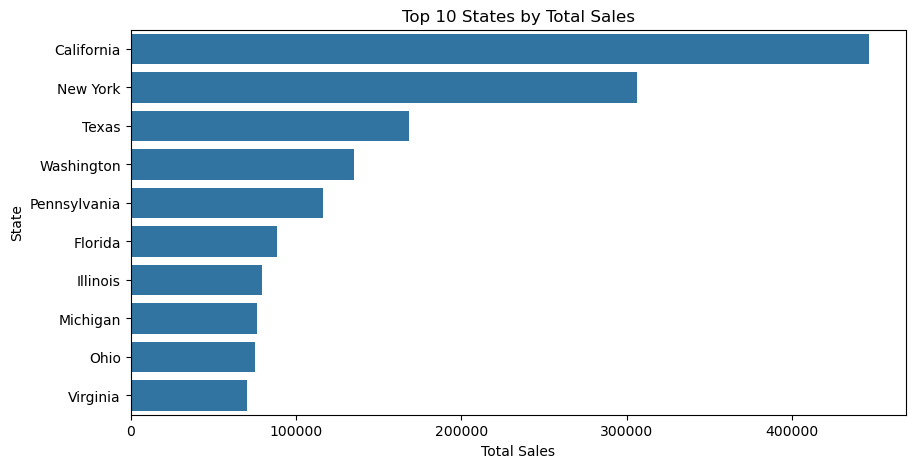

In [41]:
plt.figure(figsize=(10, 5))
top_states = sales_by_state.head(10)
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.show()

## 6. Insights & Conclusions

### Category & Product Insights
- 🧩 **Category performance:** `<Fill from your plots>`  
  - Example: *Technology has the highest total sales, followed by Office Supplies and Furniture.*
- 🧩 **Sub-category performance:**  
  - Example: *Phones, Chairs, and Binders are the top-selling sub-categories by total sales.*

### Customer & Segment Insights
- 👥 **Customer segments:**  
  - Example: *The Consumer segment contributes the highest share of total sales, followed by Corporate and Home Office.*
- 👤 **Top customers:**  
  - Example: *The top 10 customers account for around `<X>%` of total sales, indicating a slightly concentrated revenue distribution.*

### Geographic Insights
- 🌍 **Regions:**  
  - Example: *The West and East regions generate the highest total sales, while the South has comparatively lower sales.*
- 🏙️ **States / Cities:**  
  - Example: *States like California and New York are the largest contributors to sales.*

### Time-Based Insights
- ⏱️ **Monthly sales trend:**  
  - Example: *Sales generally show an upward trend over the years, with noticeable peaks around Q4 months (Oct–Dec).*
- 📅 **Seasonality:**  
  - Example: *Certain months consistently show higher average sales, which may correspond to holiday or promotional seasons.*

### Overall Summary
- The dataset shows that **a few categories, regions, and customers drive a large share of the revenue**.
- These insights could help a business **focus marketing and inventory efforts** on high-performing segments, products, and regions.
